In [32]:
# Invocamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split



# leemos la data que se transformo en EDA.ipynb
df = pd.read_csv('./transformedH.csv')


# Creamos una funcion que muestra los resultados relevantes
def get_results(y_pred, y_test, convert:bool = False):

    if(convert):
        #En caso que se hiciera una regresion a numero de dias y hubiera que convertir
        y_test = [1 if i>8 else 0 for i in y_test ]
        y_pred = [1 if i>8 else 0 for i in y_pred]

    from sklearn.metrics import confusion_matrix

    # crear una figura 
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(cm)
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    # Accuracy
    from sklearn.metrics import accuracy_score
    print('Accuracy = ', accuracy_score(y_test, y_pred))

    # Recall
    from sklearn.metrics import recall_score
    print('Recall = ', recall_score(y_test, y_pred, average=None))
    # Precision
    from sklearn.metrics import precision_score
    print('Precision = ', precision_score(y_test, y_pred, average=None))




,Department,gender,Ward_Facility_Code,Age,Available Extra Rooms in Hospital,Admission_Deposit,Severity of Illness,doctor_name,Stay (in days),output
0,2.0,0.0,3.0,4.0,4,2966.408696,0.0,8.0,8,0
1,2.0,0.0,1.0,3.0,4,3554.835677,1.0,8.0,9,1
2,2.0,0.0,1.0,2.0,2,5624.733654,0.0,8.0,7,0
3,2.0,0.0,3.0,3.0,4,4814.149231,2.0,4.0,8,0
4,1.0,1.0,4.0,7.0,2,5169.269637,2.0,2.0,34,1


Mejores hiperparámetros: {'eval_metric': 'aucpr', 'objective': 'binary:logistic'}
Mejor Score: 0.7584076655052264

Accuracy =  0.7591707317073171
Recall =  [0.63171968 0.83630669]
Precision =  [0.70020794 0.78956642]


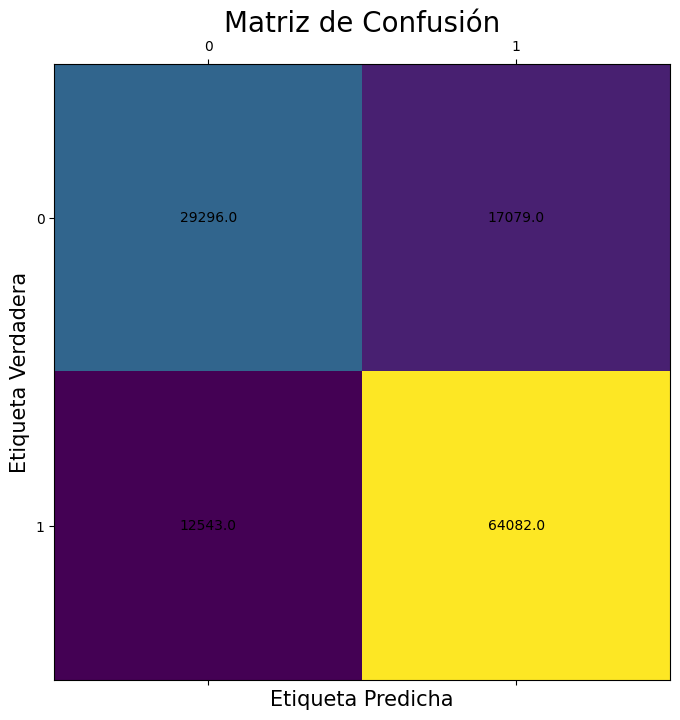

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#Probamos algunos parametros para xgb

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])

objectives=["binary:logistic"]
eval_metrics = ['aucpr', 'logloss', 'map' ]


parameters = dict(objective=objectives,
                  eval_metric = eval_metrics
                      )


xgb_model = xgb.XGBClassifier()

model = GridSearchCV(xgb_model, parameters)
model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

y_pred = xgb_model.predict(X_test)

get_results(y_pred, y_test)

# estos resultados fueron los mejores. Por eso se selecciona este modelo, para ver otros modelos que se intentaron, estan mas abajo

In [33]:
display(df)

xgb_model = xgb.XGBClassifier(objective="binary:logistic")

xgb_model.fit(df.drop(['output', 'Stay (in days)'], axis =1), df['output'])

import pickle
filename = 'xbg_trained.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

# se usa pickle para guardar el modelo. Se selecciono este modelo por ser el de mejor precision mas rapido. 

# se investigaron muchos otros modelos, se pueden revisar abajo

,Department,gender,Ward_Facility_Code,Age,Available Extra Rooms in Hospital,Admission_Deposit,Severity of Illness,doctor_name,Stay (in days),output
0,2.0,0.0,3.0,4.0,4,2966.408696,0.0,8.0,8,0
1,2.0,0.0,1.0,3.0,4,3554.835677,1.0,8.0,9,1
2,2.0,0.0,1.0,2.0,2,5624.733654,0.0,8.0,7,0
3,2.0,0.0,3.0,3.0,4,4814.149231,2.0,4.0,8,0
4,1.0,1.0,4.0,7.0,2,5169.269637,2.0,2.0,34,1
...,...,...,...,...,...,...,...,...,...,...
409995,2.0,0.0,3.0,3.0,1,3902.291076,1.0,6.0,8,0
409996,2.0,0.0,3.0,2.0,5,4771.995223,0.0,3.0,9,1
409997,2.0,0.0,3.0,2.0,4,3816.994210,1.0,6.0,9,1
409998,2.0,0.0,3.0,2.0,10,3841.577491,2.0,4.0,9,1


In [23]:

# Decision Tree Grid Search

dfg = df[df['Department'] == 2]
dfa = df[df['Department'] != 2]

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
#                                                     df['output'], test_size=0.30, 
#                                                     random_state=42, stratify=df['output'])

# X_test_g = X_test[X_test['Department'] == 2]
# y_test_g = y_test[X_test['Department'] == 2]

# X_test_a = X_test[X_test['Department'] != 2]
# y_test_a = y_test[X_test['Department'] != 2]


# X_train_g = X_train[X_train['Department'] == 2]   
# y_train_g = y_train[X_train['Department'] == 2]

# X_train_a = X_train[X_train['Department'] != 2]                                                
# y_train_a = y_train[X_train['Department'] != 2]    



Mejores hiperparámetros: {'criterion': 'log_loss', 'max_depth': 17, 'min_samples_split': 2}
Mejor Score: 0.7482229965156794

Accuracy =  0.7502845528455284
Recall =  [0.64232884 0.81562153]
Precision =  [0.67829493 0.79026099]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


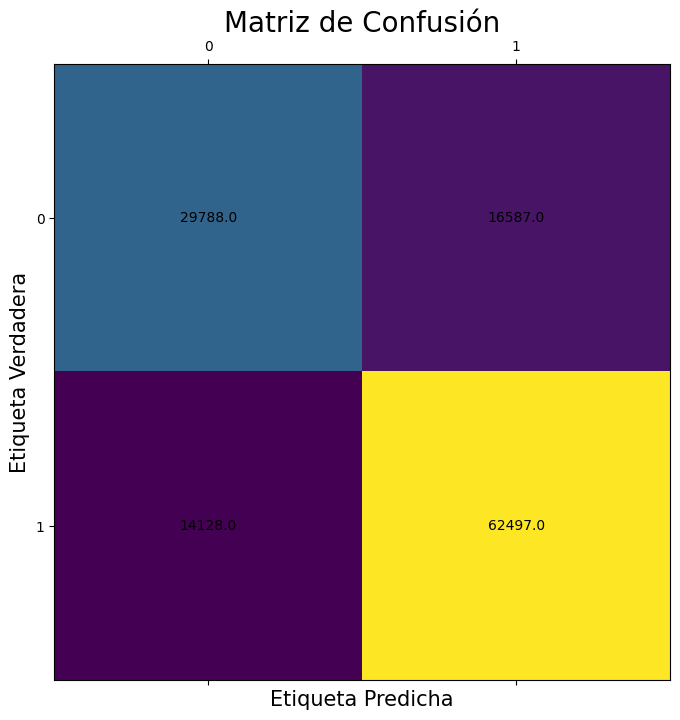

In [9]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])




from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Instanciamos un objeto de la clase DecisionTreeClassifier

criterion = ['gini', 'entropy', 'log_loss']
max_depth = [6,8,12,16, 17, 18, 19, 20, 21, 22]
mins = list(range(2,6))


parameters = dict(   criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=mins)

clf = DecisionTreeClassifier() 

model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)


get_results(y_pred, y_test)



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Mejor Score: 0.7222578397212545

Accuracy =  0.994345153173718
Recall =  [0.97606481 0.99924352]
Precision =  [0.99711599 0.99362245]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


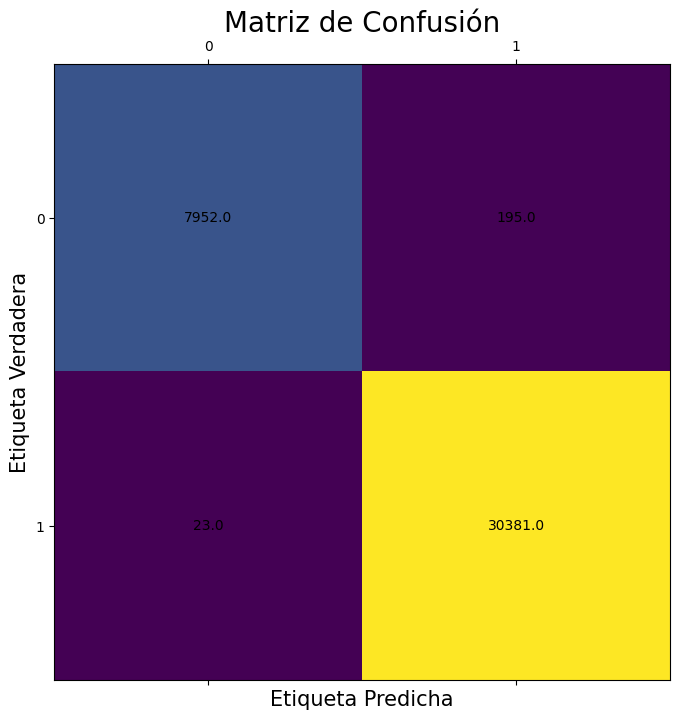

In [25]:

# X_train, X_test, y_train, y_test = train_test_split(dfa.drop(['output', 'Stay (in days)'], axis =1), 
#                                                     dfa['output'], test_size=0.30, 
#                                                     random_state=42, stratify=dfa['output'])



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Instanciamos un objeto de la clase DecisionTreeClassifier

criterion = ['gini', 'entropy', 'log_loss']
max_depth = [4,5,6,7,8,9,10] #6,8,12,16, 17, 18, 19, 20, 21, 22]
mins = list(range(2,6))


parameters = dict(   criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=mins)

clf = DecisionTreeClassifier() 

model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred_a = model.predict(X_test_a.values)


get_results(y_pred_a, y_test_a)

Accuracy =  0.7491951219512195
Recall =  [0.6436442  0.81307667]
Precision =  [0.67574482 0.79035368]


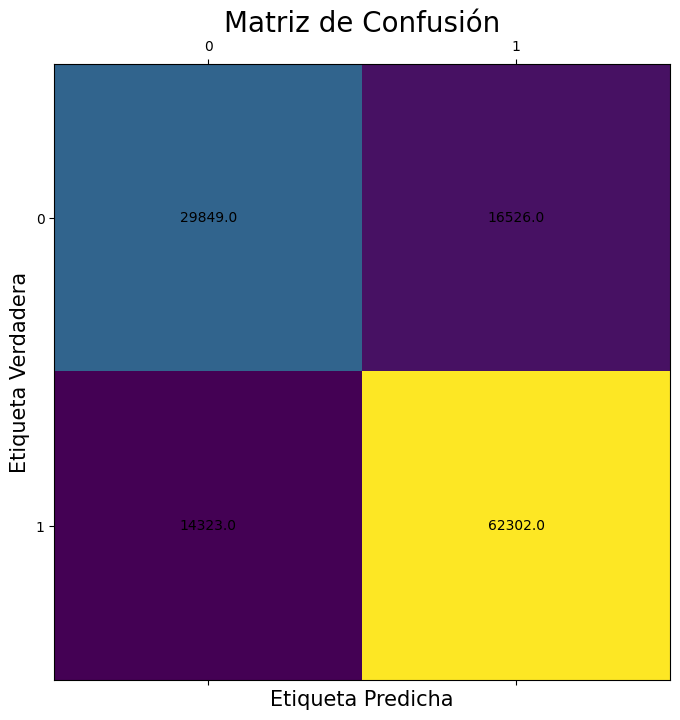

In [26]:
X_test.loc[X_test[X_test['Department'] == 2].index,'pred' ] = y_pred_g
X_test.loc[X_test[X_test['Department'] != 2].index,'pred' ] = y_pred_a

y_pred = X_test['pred']

get_results(y_pred, y_test)

Las pendientes del modelo de regresión lineal son: [ 1.27534390e-08 -2.11223722e+00  5.00899213e+00 -2.77815785e-01
  1.76553108e+00  2.07434122e-02  1.45718710e-04  1.47330352e-01
 -5.35152154e-01]
La ordenada al origen del modelo de regresión lineal es: 11.758762321683081
Coeficiente de determinación r2 de la regresión múltiple en entrenamiento 0.5282863522429577
Coeficiente de determinación r2 de la regresión múltiple en test 0.5206722657228233
Coeficiente de determinación r2 de la regresión múltiple en test 1.0
Accuracy =  0.6023821138211383
Recall =  [0.1971752  0.84762153]
Precision =  [0.43919308 0.6356332 ]


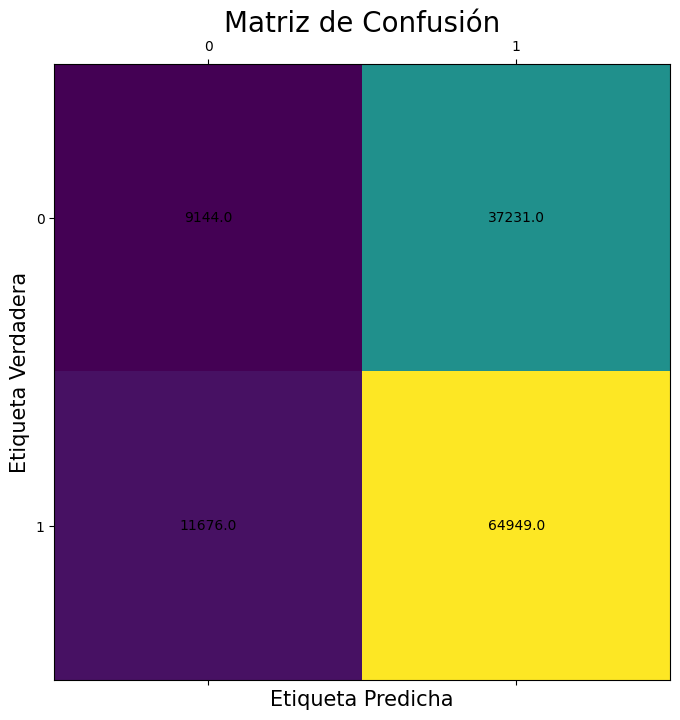

In [4]:
## Regresion lineal

# %%
X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['Stay (in days)'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

#y_train_pred = linear_model.predict(X_train)
y_pred= linear_model.predict(X_test)

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

#rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

#print("Coeficiente de determinación r2 de la regresión múltiple en entrenamiento", r2_score(y_train_pred, linear_model.predict(X_train)))
print("Coeficiente de determinación r2 de la regresión múltiple en test", r2_score(y_pred, linear_model.predict(X_test)))

get_results(y_pred, y_test, True)


(287000, 210) (123000, 210)
Accuracy =  0.6023821138211383
Recall =  [0.1971752  0.84762153]
Precision =  [0.43919308 0.6356332 ]


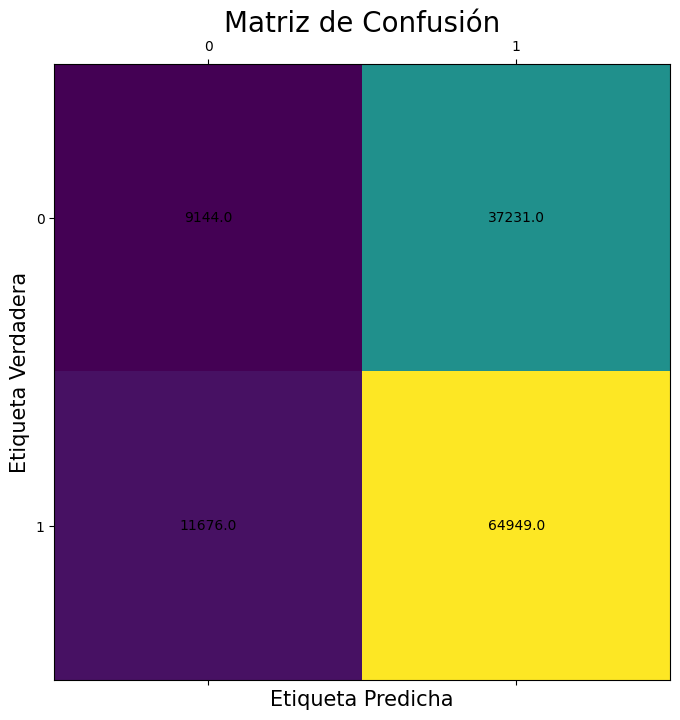

In [5]:
# Regresion polinomica

# %%
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['Stay (in days)'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures((2,3), include_bias=False)

poly.fit(X_test, y_test)

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

print(X_train_new.shape, X_test_new.shape)

reg_2 = LinearRegression()

reg_2.fit(X_train_new, y_train)

y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

get_results(y_pred, y_test, True)



Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 16, 'n_jobs': -1, 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
Mejor Score: 0.5339433980489184



c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy =  0.5409643973108608
Recall =  [0.38260301 0.67181117]
Precision =  [0.4906401  0.56839795]


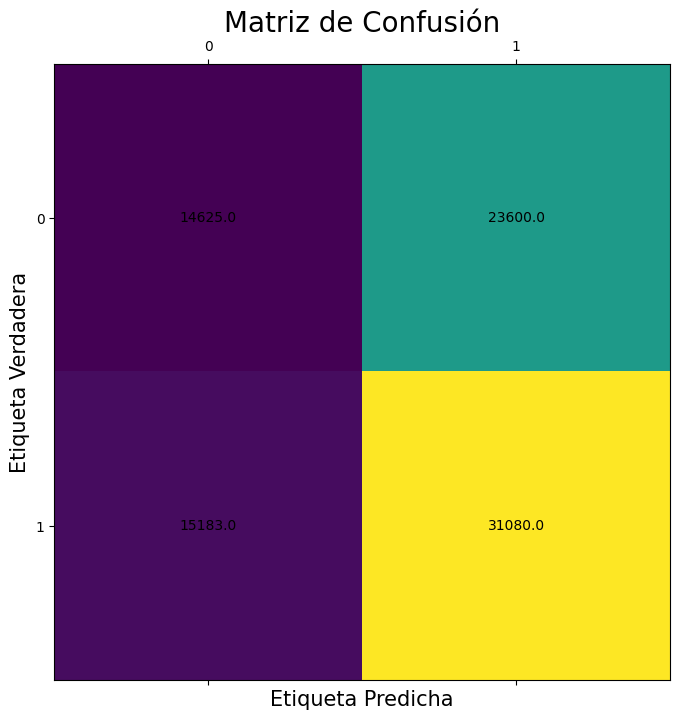

In [34]:

# KNeighbors

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(dfg.drop(['output', 'Stay (in days)'], axis =1), 
                                                    dfg['output'], test_size=0.30, 
                                                    random_state=42, stratify=dfg['output'])


from sklearn.neighbors import KNeighborsClassifier

algorithms = ['auto', 'kd_tree'] #, 'ball_tree', 'brute']
weightss = ['uniform']
neighborss = list(range(10,20))
leaf_sizes = [16, 17, 18, 19, 20]
ps= [1,2]

parameters = dict(algorithm = algorithms,
                  n_neighbors= neighborss,
                  weights = weightss,
                  leaf_size = leaf_sizes,
                  p = ps,
                  n_jobs = [-1]
                      )

clf = KNeighborsClassifier()

model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)

get_results(y_pred, y_test)


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Mejores hiperparámetros: {'C': 1.0, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42}
Mejor Score: 0.622965156794425

Accuracy =  0.6229674796747967
Recall =  [0. 1.]
Precision =  [0.         0.62296748]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


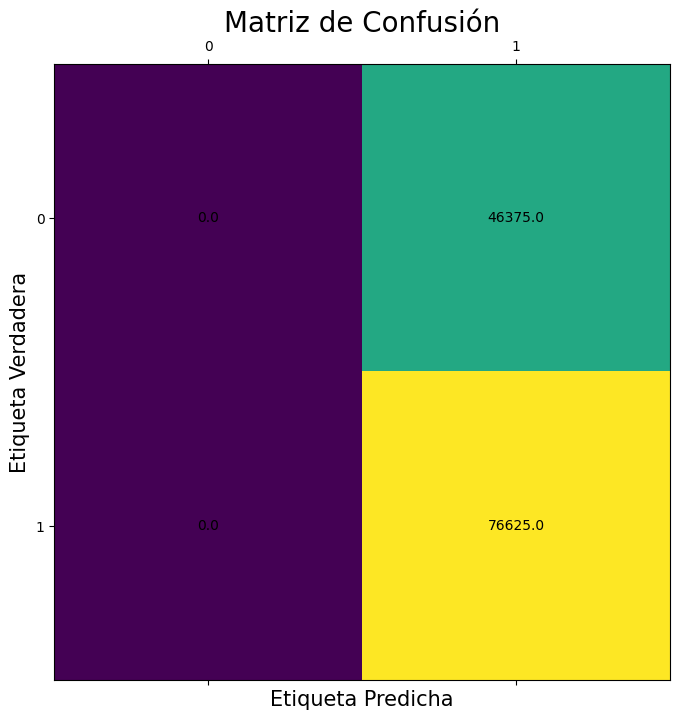

In [7]:
# Regresion Logistica
# %%

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])



penaltys = ['l2']
duals = [True, False]
Cs= [1.0, 0.95, 0.9, 0.8]
fit_intercepts = [True, False]
intercept_scalings= [1,2]
random_states = [42]
n_jobss = [-1]

parameters = dict(penalty = penaltys,
                  dual = duals,
                  C= Cs,
                  fit_intercept = fit_intercepts,
                  intercept_scaling= intercept_scalings,
                  random_state = random_states,
                  n_jobs= n_jobss
                      )


clf = LogisticRegression()


model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)

get_results(y_pred, y_test)



Accuracy =  0.6340071962882303
Recall =  [0.56884238 0.6878499 ]
Precision =  [0.60091198 0.65879966]


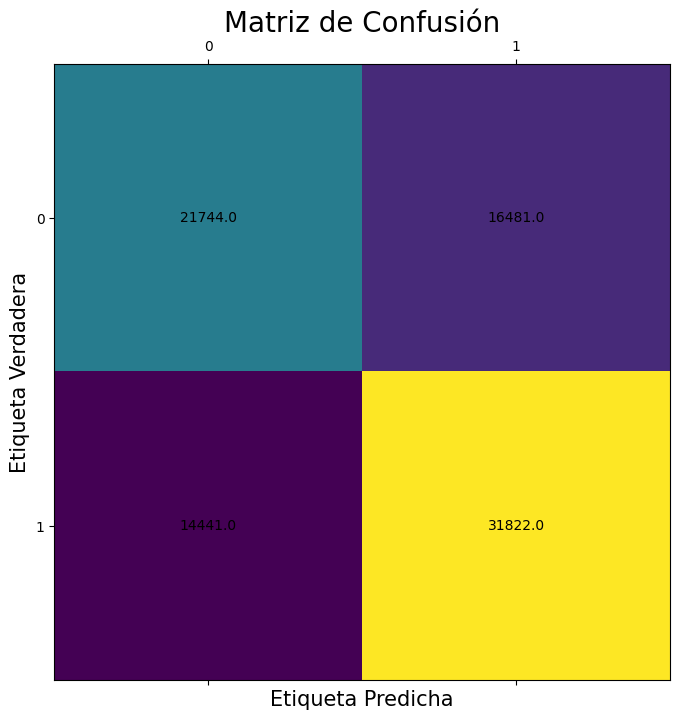

In [33]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(dfg.drop(['output', 'Stay (in days)'], axis =1), 
                                                    dfg['output'], test_size=0.30, 
                                                    random_state=42, stratify=dfg['output'])




clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score= True, random_state = 42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

get_results(y_pred, y_test)

In [9]:
# Importamos cross_val_score 

from sklearn.model_selection import cross_validate

X = df.drop(['output', 'Stay (in days)'], axis =1)
y = df['output']

tree = DecisionTreeClassifier(max_depth= 17, criterion= 'entropy', min_samples_split = 2)
knn = KNeighborsClassifier(n_neighbors=1)

tree_scores = cross_validate(tree, X, y, cv=5, scoring = ['recall', 'accuracy'], n_jobs= -1)
knn_scores = cross_validate(knn, X, y, cv=5, scoring = ['recall', 'accuracy'], n_jobs= -1)

print(tree_scores)
print(knn_scores)

print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

NameError: name 'DecisionTreeClassifier' is not defined

In [37]:
from sklearn.svm import SVC 

svm = SVC(gamma=2, C=1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])

# Se entrena el modelo
svm.fit(X_train, y_train)

# Predicciones
y_pred = svm.predict(X_test)

get_results(y_pred, y_test)

Accuracy =  0.6832357723577236
Recall =  [0.47887871 0.8069168 ]
Precision =  [0.60016755 0.71897857]


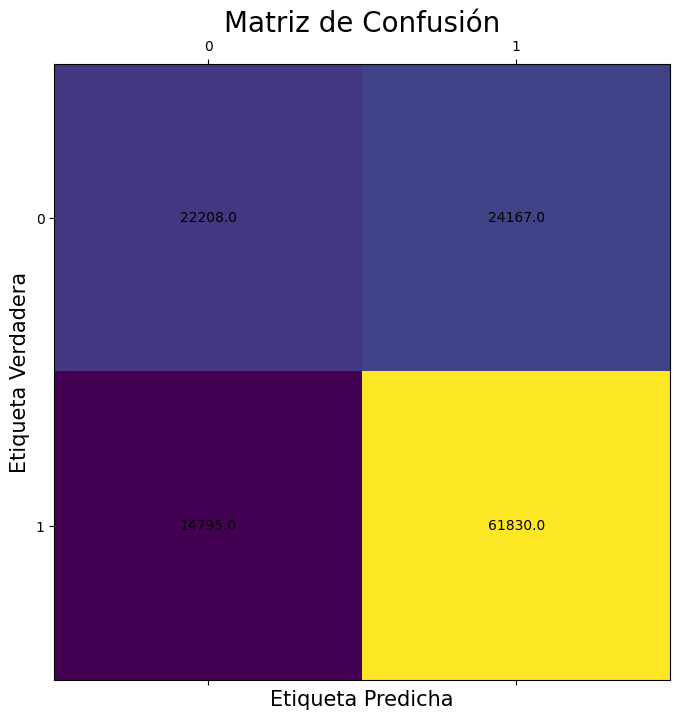

In [3]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])


clf = AdaBoostClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

get_results(y_pred, y_test)



Accuracy =  0.38521138211382117
Recall =  [0.        0.        0.6183491]
Precision =  [0.         0.         0.54546187]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


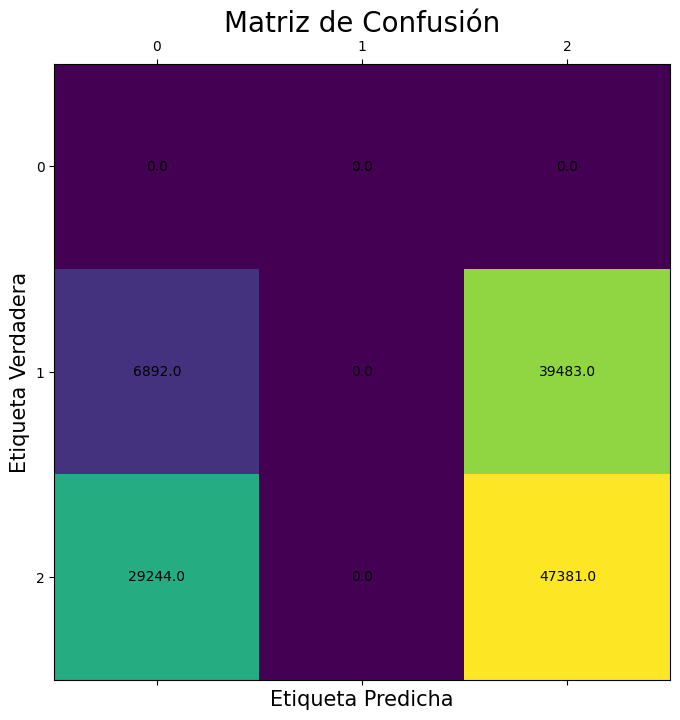

In [6]:
from sklearn.ensemble import IsolationForest

X_train, X_test, y_train, y_test = train_test_split(df.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df['output'], test_size=0.30, 
                                                    random_state=42, stratify=df['output'])

clf = IsolationForest(n_estimators = 300, random_state=0, bootstrap = True)


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

get_results(y_pred, y_test)

Accuracy =  0.620650406504065
Recall =  [0.01041509 0.98997716]
Precision =  [0.38609113 0.62306056]


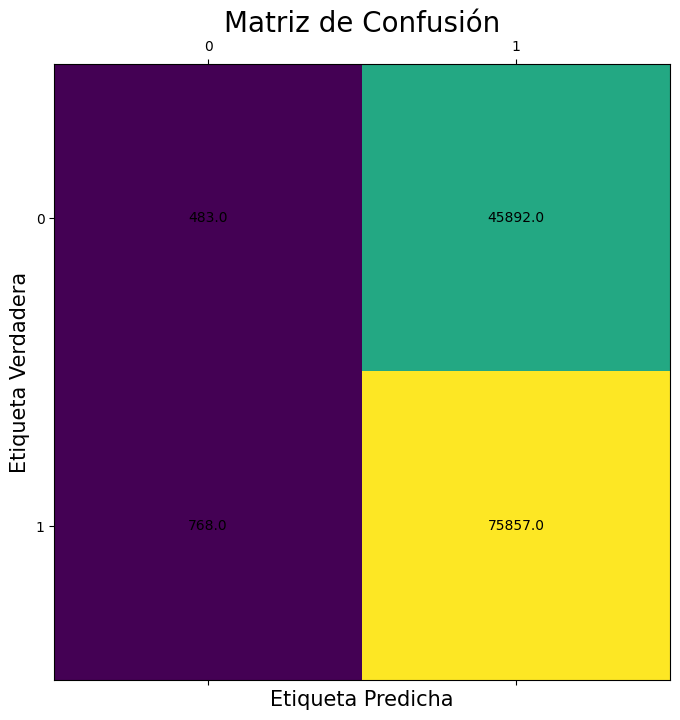

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

get_results(y_pred, y_test)


Accuracy =  0.6229674796747967
Recall =  [0. 1.]
Precision =  [0.         0.62296748]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


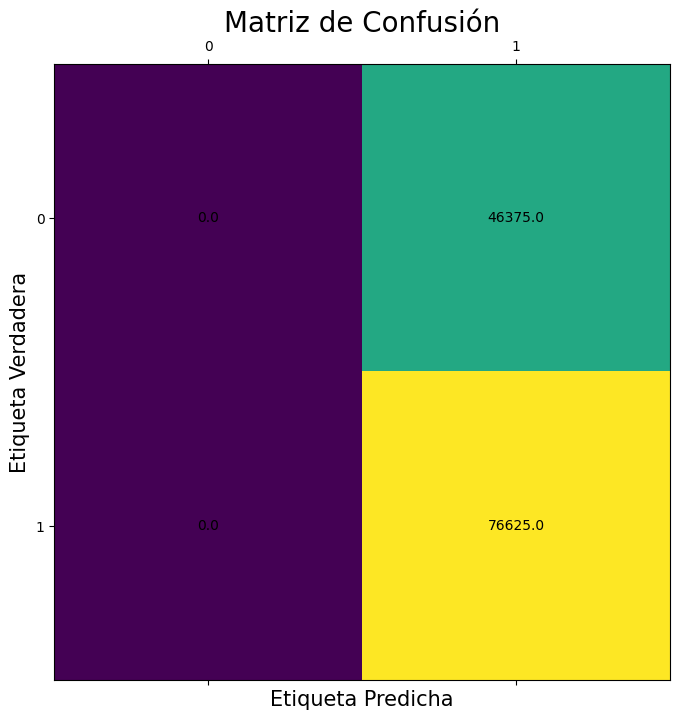

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=400, warm_start=True)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

get_results(y_pred, y_test)